# 캐글러 대상 설문조사
- 설문기간 : 2021년 9월 1일부터 2021년 10월 4일까지
- 171개 국가 및 지역에서 25,973명의 응답자
- 특정 국가 및 지역의 응답자가 50명 미만인 경우 익명성을 위해 '기타'그룹으로 그룹화
- 캐글 이메일, 캐글 웹사이트, 캐글 트위터로 설문 진행

In [1]:
# 데이터 다운로드
# !kaggle competitions download -c kaggle-survey-2021

In [2]:
# 패키지 불러오기
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings 감추기
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 데이터 불러오기
question = pd.read_csv('./data/kaggle_survey_2021_responses.csv')
question.shape

(25974, 369)

## 데이터 확인하기
- 368개의 문항과 25973개의 응답 존재
- 첫 행 : 문항 세부 내용

In [4]:
question.head()
que = question.iloc[0] # 질문 세부사항
answer = question.iloc[1:] # 답변 목록

<AxesSubplot:>

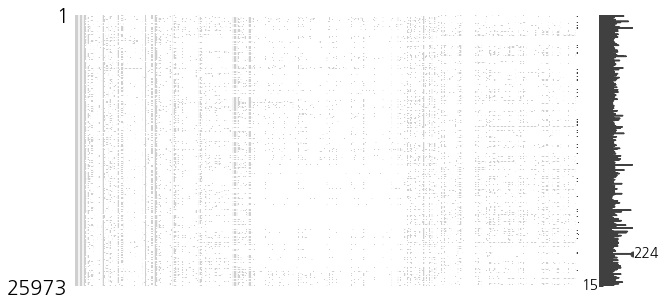

In [5]:
# missingno : NaN 데이터들에 대해 시각화 해준다.
# NaN 데이터 컬럼이 많아 아래 그래프만으로는 내용 파악이 어렵다.
import missingno as msno
msno.matrix(answer, figsize=(10,5))

## 설문 통계

### 성별 
Q2. 'What is your gender? - Selected Choice'

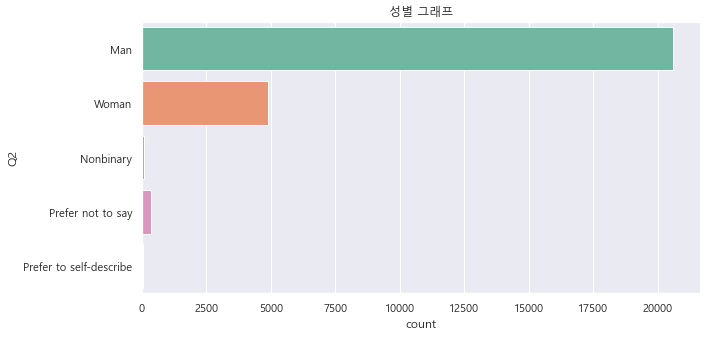

In [307]:
plt.figure(figsize=(10,5))
sns.countplot(y='Q2', data=answer, palette='Set2')
plt.title('성별 그래프')
plt.show()

여성보다는 남성의 비율이 훨씬 높은 편이다. 

### 단일 응답 항목 그래프 함수 작성

In [308]:
# Question Number를 넘겨주면 어떤 질문인지 반환하는 함수
def get_question_title_by_qno(qno):
    if qno in question.columns:
        return question[qno][0]
    else:
        q_no = question.filter(regex=qno).iloc[0,0].split("-")[0] # qno가 들어가는 question 추출, 그 중 하나만 반환
        return q_no

In [378]:
def show_countplot_by_qno(answer, qno, odr=None, title=None):
    if not odr:
        if not title:
            odr = answer[qno].value_counts().index
            sns.countplot(data = answer, y=qno, palette='Greens_r', order = odr).set_title(get_question_title_by_qno(qno))
        else:
            odr = answer[qno].value_counts().index
            sns.countplot(data = answer, y=qno, palette='Greens_r', order = odr).set_title(title)

### 국가별 응답 수
Q3. 'In which country do you currently reside?'

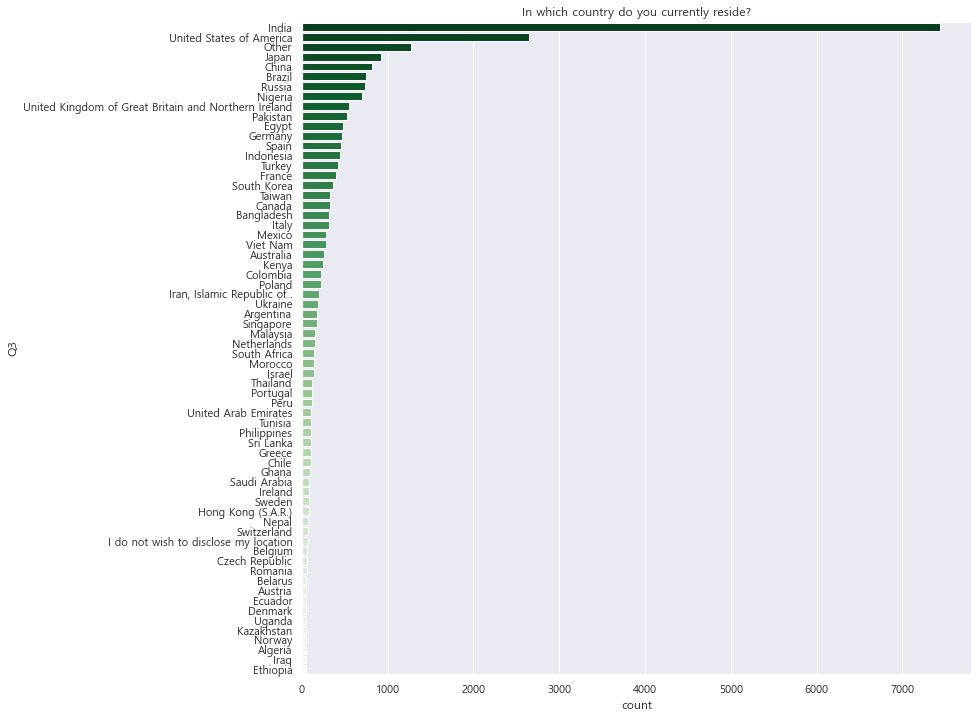

In [379]:
plt.figure(figsize=(12,12))
show_countplot_by_qno(answer, 'Q3')

In [7]:
# 국가별 구체적 응답 수 확인
con_df = pd.DataFrame(answer['Q3'].value_counts())
print(con_df)
con_df['국가'] = con_df.index
# 컬럼의 순서대로 응답 수, 국가로 컬럼명 지정
con_df.columns = ['응답 수','국가']
# index 컬럼 삭제하고 순위를 알기 위해 reset_index() 해준다.
con_df = con_df.reset_index().drop('index', axis=1)
con_df.head(20)

                            Q3
India                     7434
United States of America  2650
Other                     1270
Japan                      921
China                      814
...                        ...
Kazakhstan                  45
Norway                      45
Algeria                     44
Iraq                        43
Ethiopia                    43

[66 rows x 1 columns]


,응답 수,국가
0,7434,India
1,2650,United States of America
2,1270,Other
3,921,Japan
4,814,China
5,751,Brazil
6,742,Russia
7,702,Nigeria
8,550,United Kingdom of Great Britain and Northern I...
9,530,Pakistan


전체 52개국 중 20위까지만 확인함.   
우리나라는 16위에 위치하고 있으며 1위는 인도, 2위는 미국임.

### 나이
Q1. What is your age (#years)?

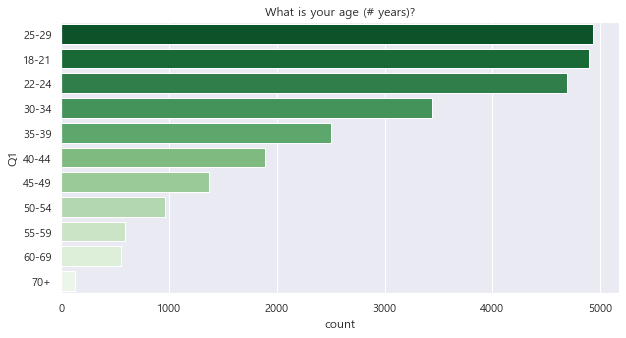

In [371]:
show_countplot_by_qno(answer,'Q1')

  응답자의 대부분이 20대이며, 나이대가 높아지면서 응답자 수가 감소하는 경향이 보인다.

### 학력
Q4 : 이미 취득했거나 향후 2년 이내 취득 계획이 있는 가장 높은 학력은 ?

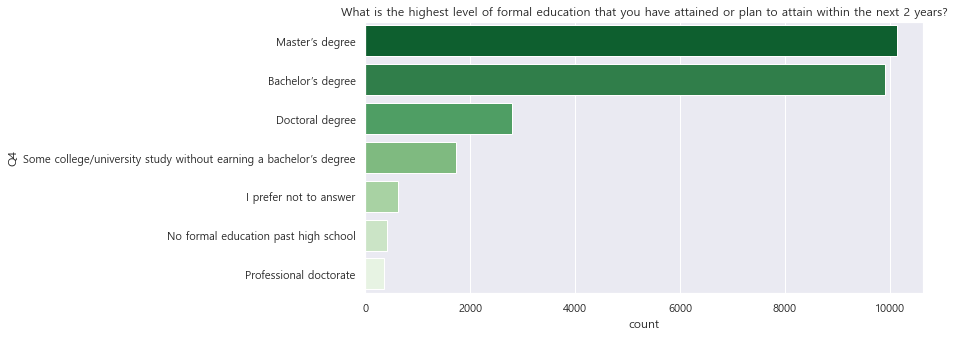

In [372]:
show_countplot_by_qno(answer,'Q4')

학사 학위를 가진 사람과 석사 학위를 가진 사람의 수가 비슷하며 석사 학위를 가진 사람의 수가 약간 많다.   
박사 학위를 가진 사람들도 많다.

### 직업

In [11]:
# normalize=True 옵션 : 해당 데이터가 전체 데이터에서 어느정도의 비율을 차지하는지 알 수 있다.
answer_role_count = pd.DataFrame(answer['Q5'].value_counts())
answer_role_percent = pd.DataFrame(answer['Q5'].value_counts(normalize=True))
answer_role_df = answer_role_count.merge(answer_role_percent, left_index=True, right_index=True)
answer_role_df.columns = ['응답 수','비율']
answer_role_df

,응답 수,비율
Student,6804,0.261964
Data Scientist,3616,0.139221
Software Engineer,2449,0.094290
Other,2393,0.092134
Data Analyst,2301,0.088592
Currently not employed,1986,0.076464
Research Scientist,1538,0.059215
Machine Learning Engineer,1499,0.057714
Business Analyst,968,0.037269
Program/Project Manager,849,0.032688


응답자의 26%가 학생이고, 다음으로 데이터 사이언티스트, 소프트웨어 엔지니어, 데이터분석가 순이다.

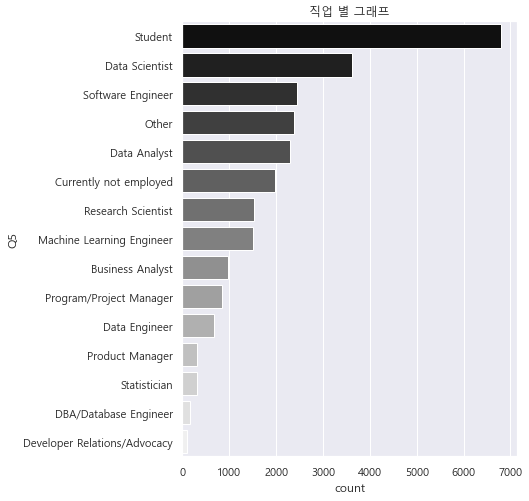

In [316]:
# 직업 시각화
plt.figure(figsize=(6,8))
sns.countplot(y='Q5', data=answer, order=answer['Q5'].value_counts().index, palette='binary_r')
plt.title('직업 별 그래프')
plt.show()

### 프로그래밍 경험
Q6. 'For how many years have you been writing code and/or programming?'

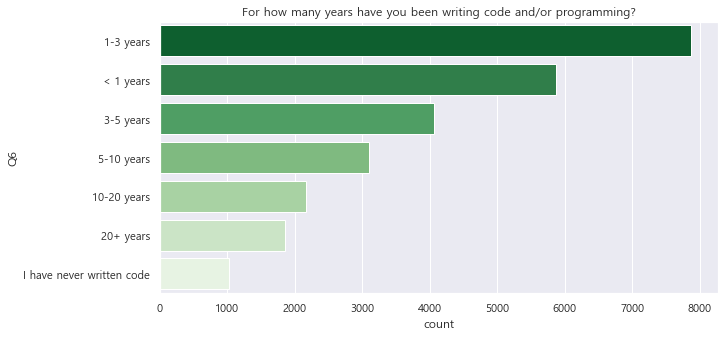

In [373]:
show_countplot_by_qno(answer,'Q6')

In [336]:
answer['Q6'].unique()

array(['5-10 years', '20+ years', '1-3 years', '< 1 years', '3-5 years',
       '10-20 years', 'I have never written code'], dtype=object)

In [348]:
q6_cols

['5-10 years',
 '20+ years',
 '1-3 years',
 '< 1 years',
 '3-5 years',
 '10-20 years',
 'I have never written code']

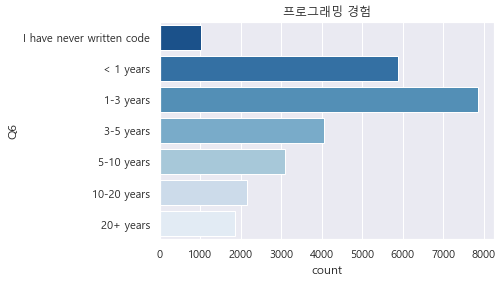

In [351]:
q6_cols = ['I have never written code','< 1 years','1-3 years','3-5 years',
           '5-10 years','10-20 years','20+ years']
sns.countplot(y='Q6', data=answer, order=q6_cols, palette="Blues_r")
plt.title('프로그래밍 경험')
plt.show()

1-3년의 경험을 가진 사람이 가장 많고, 1년 미만의 경험을 가진 사람이 그 다음으로 많다.   
( 과거 2017년의 설문 결과와 비교해보면 프로그래밍 뉴비들이 많이 늘어난 것 같음 ! )

### 한국

The number of interviewees in Korea: 359


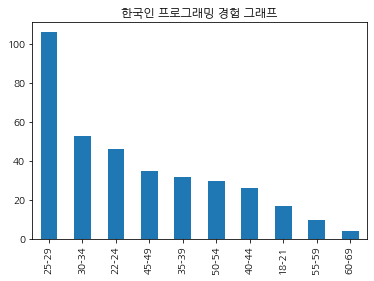

In [38]:
# 프로그래밍 경험
korea = answer.loc[(answer['Q3']=='South Korea')]

print("The number of interviewees in Korea: " + str(korea.shape[0]))

korea['Q1'].value_counts().plot.bar()
plt.title('한국인 프로그래밍 경험 그래프')
plt.show()

우리나라의 경우 20대후반과 30대 초반이 가장 많고, 전체 나라에서의 그래프와 비교했을 때 18-21세의 순위가 매우 낮은 것을 확인할 수 있다.   
(캐글을 몰라서 ? ?)

In [15]:
# 성별
pd.DataFrame(korea['Q2'].value_counts())

,Q2
Man,283
Woman,72
Prefer not to say,4


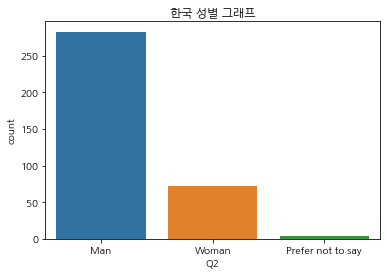

In [39]:
sns.countplot(x='Q2', data=korea)
plt.title('한국 성별 그래프')
plt.show()
# 남성이 여성보다 훨씬 많다.

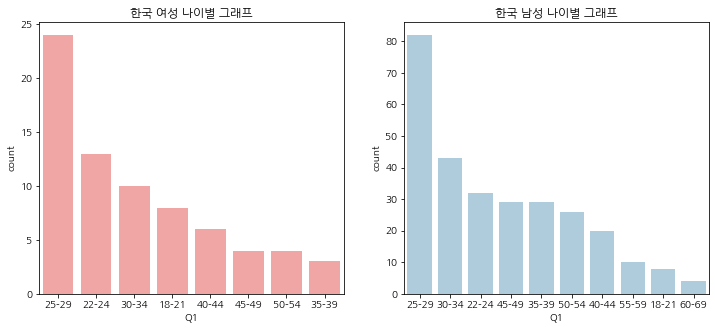

In [30]:
# 성별을 연령대별로 시각화
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.countplot(korea['Q1'].loc[korea['Q2']=='Woman'],color=sns.color_palette('Paired')[4],
              order = korea['Q1'].loc[korea['Q2']=='Woman'].value_counts().index, ax=ax1)
sns.countplot(korea['Q1'].loc[korea['Q2']=='Man'],color=sns.color_palette('Paired')[0],
              order = korea['Q1'].loc[korea['Q2']=='Man'].value_counts().index, ax=ax2)

ax1.set_title('한국 여성 나이별 그래프')
ax2.set_title('한국 남성 나이별 그래프')

plt.show()

여성과 남성 모두 20대 후반이 가장 많고   
남성은 20대 초반보다 30대 초반이, 여성은 30대 초반보다 20대 초반이 조금 더 많다.

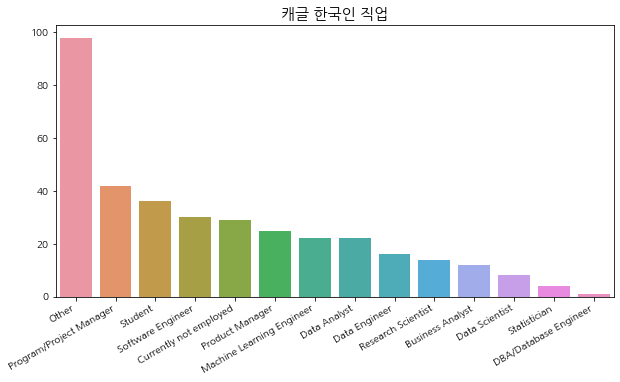

In [40]:
# 직업
plt.figure(figsize=(10,5))
sns.barplot(x=korea['Q5'].unique(), y=korea['Q5'].value_counts())
plt.xticks(rotation=30, ha='right')
plt.title('캐글 한국인 직업', fontsize=15)
plt.ylabel('')
plt.show()

PM이 가장 많고, 다음으로 학생, 소프트웨어엔지니어, 비 고용상태 순이다.

## 자주 묻는 질문 FAQ
- 초보자들이 묻는 가장 일반적인 질문에 대한 답을 시각화 해본다.

## Q1. Python과 R중 어떤 언어를 배워야 할까요 ? 

Q7. What programming languages do you use on a regular basis? 
- 질문에 대한 답 다중 선택이 가능함. 
- 각 언어가 열별로 구성되어 해당 언어를 선택한 사용자외에는 NaN으로 처리되어있음(Q7_Part_1 ~ Q7_OTHER)

Q8. What programming language would you recommend an aspiring data scientist to learn first?

In [67]:
# Q7에 대한 질문만 인덱싱
Q7 = answer.loc[:,'Q7_Part_1':'Q7_OTHER']
# 열이름 변경
Q7.columns = ['Python','R','SQL','C','C++','Java','Javascript','Julia','Swift','Bash','MATLAB','None','Other']
Q7.head()

,Python,R,SQL,C,C++,Java,Javascript,Julia,Swift,Bash,MATLAB,None,Other
1,Python,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,SQL,C,C++,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Python,NaN,NaN,NaN,C++,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Python,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,MATLAB,NaN,NaN


In [112]:
# 응답 별 개수 세기
Q7_answer = Q7.count()
Q7_answer.sort_values(ascending=False, inplace=True)

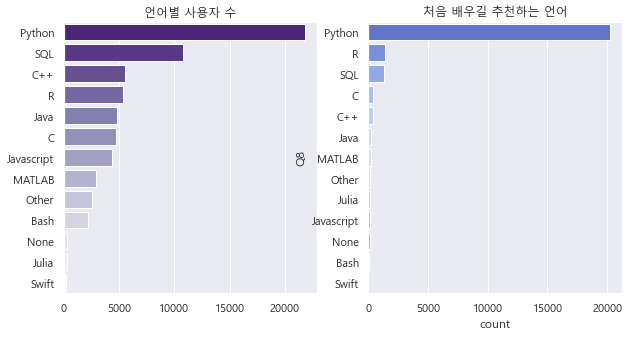

In [357]:
plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,2,1)
sns.barplot(y=Q7_answer.index, x=Q7_answer.values, palette='Purples_r')
plt.title('언어별 사용자 수')

plt.subplot(1,2,2)
sns.countplot(y='Q8', data=answer, palette='coolwarm', order = answer['Q8'].value_counts().index)
plt.title('처음 배우길 추천하는 언어')
plt.show()

첫번째 그래프를 통해 현재 사용자들은 파이썬,SQL,C++,R 순으로 많이 사용하는 것을 알 수 있고   
두번째 그래프를 통해 파이썬,R,SQL 순으로 먼저 배우길 추천하는 것을 알 수 있다.   
∴ R보다는 파이썬을 명확하게 선호하는 것으로 보인다.

### 다중 응답 항목 그래프 함수 작성

In [359]:
# Question Number를 넘겨주면 선택지에 대한 응답값을 빈도수로 반환하는 함수
def get_multiple_choice_answer_by_qno(answer,qno):
    df_answer = answer.filter(regex=qno)
    answer_desc = df_answer.describe()
    answer_count = answer_desc.loc[["top","count"]].T.set_index("top")
    answer_count = answer_count.sort_values("count", ascending=False)
    return answer_count

In [366]:
# 다중 응답 항목 그래프로 그려주는 함수
def show_multiple_choice_bar_plot_by_qno(answer,qno,title=None):
    multiple_choice_answer = get_multiple_choice_answer_by_qno(answer,qno)
    if not title:
        sns.barplot(data=multiple_choice_answer, y=multiple_choice_answer.index,
                   x="count", palette='Blues_r').set_title(get_question_title_by_qno(qno))
    else:
        sns.barplot(data=multiple_choice_answer, y=multiple_choice_answer.index,
                   x="count", palette='Blues_r').set_title(title)

#### 전문가와 강사들이 선호하는 언어 알아보기
현재 직업이 Data Scientist, Data Analyst, Machine Learning Engineer, Data Engineer, DBA/Database Engineer인 사람들로 직업을 특정하여 위 그래프를 다시 그려봄

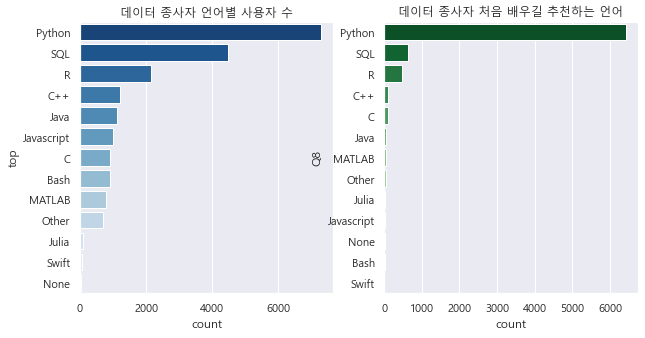

In [380]:
role_list = ['Data Scientist','Data Analyst','Machine Learning Engineer','Data Engineer','DBA/Database Engineer']
data_expert = answer[answer['Q5'].isin(role_list)]
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
show_multiple_choice_bar_plot_by_qno(data_expert,'Q7',title='데이터 종사자 언어별 사용자 수')
plt.subplot(1,2,2)
show_countplot_by_qno(data_expert,'Q8',title='데이터 종사자 처음 배우길 추천하는 언어')
plt.show()

In [381]:
# 한글 깨짐 설정
# Matplotlib 한글 폰트 오류 해결
from matplotlib import font_manager, rc
font_path = "./malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family = font_name)

In [383]:
get_multiple_choice_answer_by_qno(answer,'Q7')

,count
top,
Python,21860
SQL,10756
C++,5535
R,5334
Java,4769
C,4709
Javascript,4332
MATLAB,2935
Other,2575


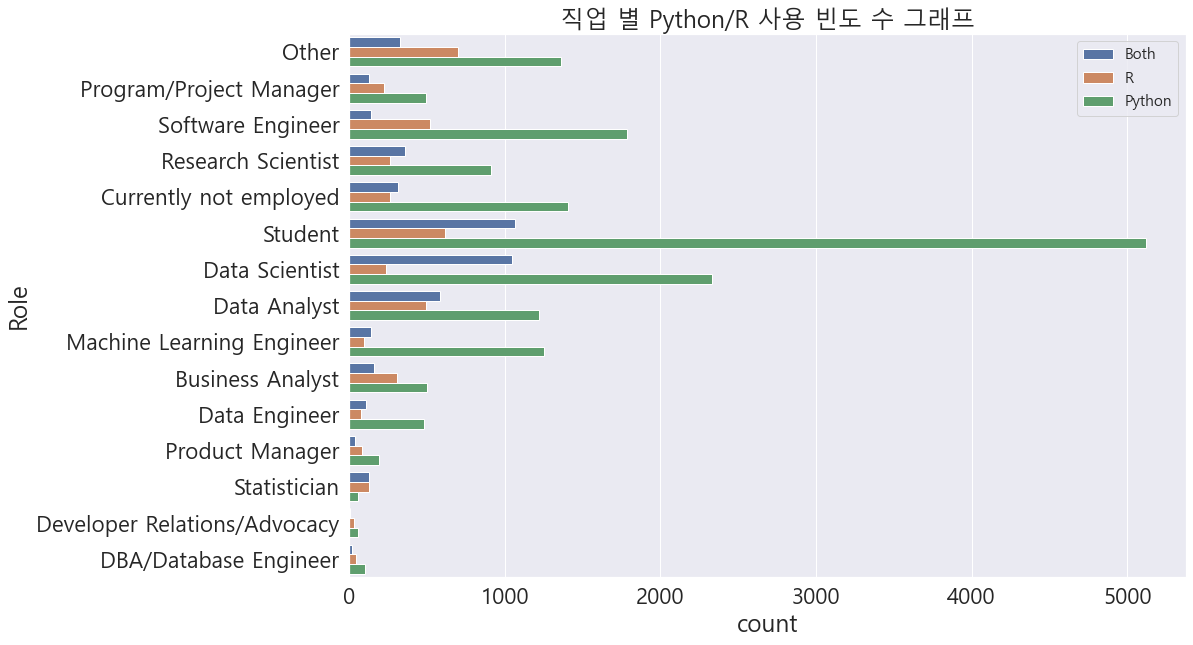

In [203]:
# 업종 별 Python/R 사용 빈도 수 
def language(answer):
    if (answer['Q7_Part_1']=='Python') & (answer['Q7_Part_2']=='R'): # Python, R 모두 선택
        return 'Both'
    elif answer['Q7_Part_1']=='Python': # Python만
        return 'Python'
    else: # R만
        return 'R'
answer['lang'] = answer.apply(lambda x: language(x), axis=1)
plt.figure(figsize=(15,10))
sns.countplot(y='Q5', hue='lang', data=answer, palette='deep')
plt.ylabel('Role')
plt.title('직업 별 Python/R 사용 빈도 수 그래프')
plt.legend(fontsize=15)
plt.show()

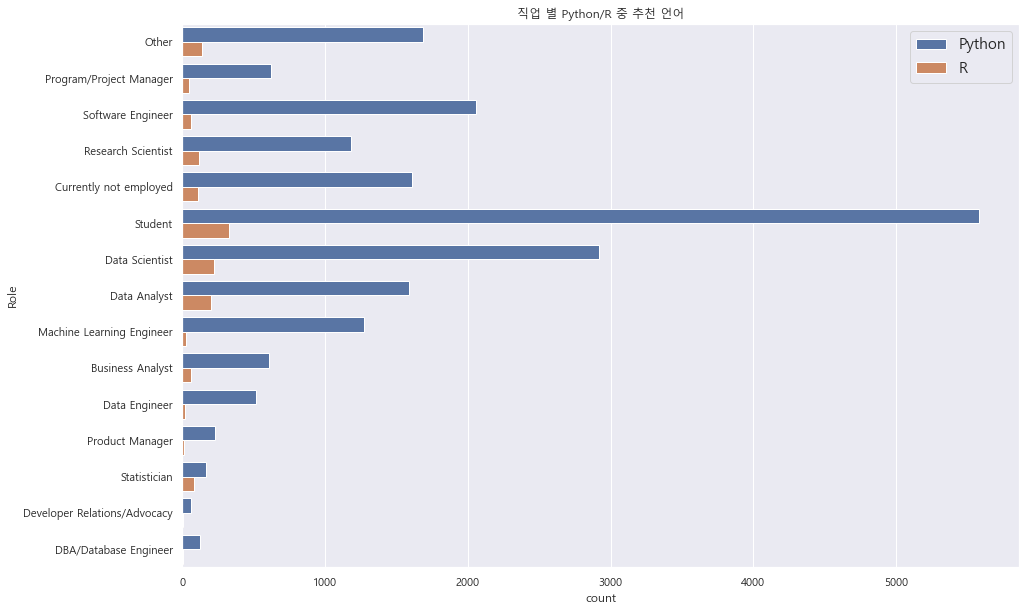

In [207]:
# 업종 별 Python/R 추천 수 
def language(answer):
    if answer['Q8']=='Python': # Python만
        return 'Python'
    elif answer['Q8']=='R': # R만
        return 'R'
answer['lang_recommend'] = answer.apply(lambda x: language(x), axis=1)
plt.figure(figsize=(15,10))
sns.countplot(y='Q5', hue='lang_recommend', data=answer, palette='deep')
plt.ylabel('Role')
plt.title('직업 별 Python/R 중 추천 언어')
plt.legend(fontsize=15)
plt.show()

대부분의 직업에서 파이썬 사용 빈도가 압도적으로 높은 것을 확인할 수 있다.   
데이터 직군에서는 파이썬을 주로 사용하지만 R도 함께 사용하는 사람들도 많은 것을 알 수 있다.   
Engineer들은 파이썬을 훨씬 더 많이 사용하며 통계학자의 경우 파이썬과 R을 모두 사용하거나 R만 사용하는 사용자가 많다.   
대부분의 직업에서 파이썬을 가장 처음 배우면 좋을 언어로 응답했다.

## Q2. 어떤 플랫폼에서 데이터사이언스를 배워야할까요 ?
Q40. On which platforms have you begun or completed data science courses? (Select all that apply)   

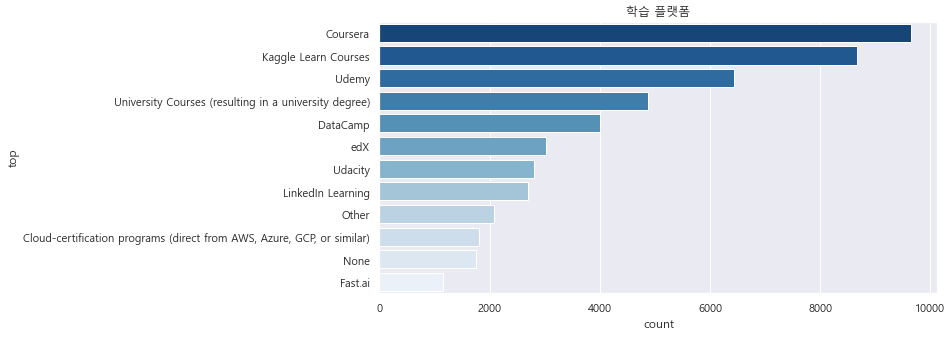

In [391]:
plt.figure(figsize=(10,5))
show_multiple_choice_bar_plot_by_qno(answer,'Q40', title='학습 플랫폼')

Coursera가 응답자들 사이에서 가장 많이 처음 데이터사이언스를 접한 플랫폼이다.   
Kaggle Learn Courses가 그 다음으로 높지만, 설문조사 주최가 Kaggle이므로 편향되었을 가능성이 있다.   
그 이후로는 Udemy, 대학수업, DataCamp 순으로 높다.

## Q3. 데이터 사이언스 프로젝트를 위해 높은 사양의 컴퓨터가 필요할까요?
Q11. What type of computing platform do you use most often for your data science projects?

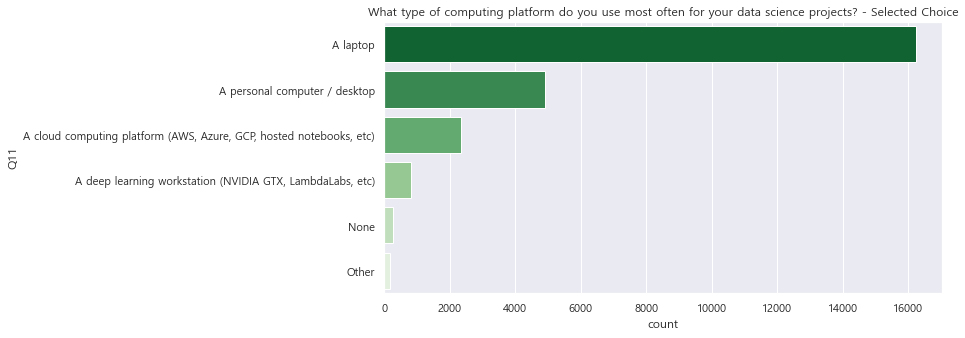

In [388]:
plt.figure(figsize=(10,5))
show_countplot_by_qno(answer,'Q11')

노트북을 사용하는 응답자가 가장 많고, 데스크탑을 사용하는 사람이 그 다음이고 클라우드 컴퓨팅 환경에서 프로젝트를 진행하는 응답자가 그 다음이다.

## Q4. 어떤 개발환경을 사용해야 할까요 ? 
Q9. Which of the following integrated development environments (IDE's) do you use on a regular basis?
(Select all that apply)

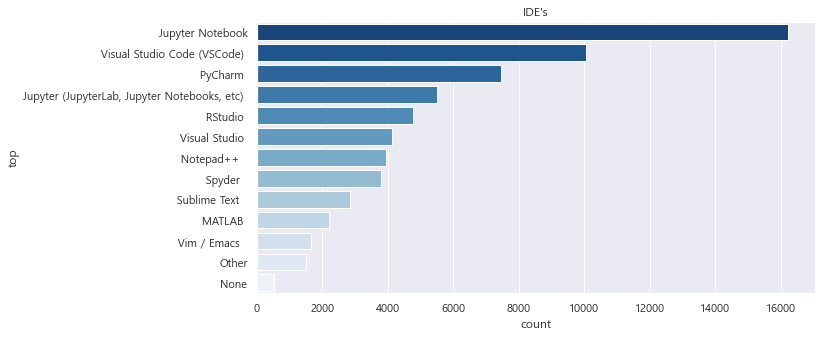

In [386]:
plt.figure(figsize=(10,5))
show_multiple_choice_bar_plot_by_qno(answer,'Q9',title='IDE\'s')

Jupyter Notebook을 사용하는 응답자들이 가장 많고, VSCode가 그 다음이다.